This notebook is used to perform basic EDA on the CBECS dataset.

In [60]:
# Import packages
import pandas as pd
import pathlib
import yaml
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Now we'll read in data from both 2018 and 2012

In [ ]:
import pathlib
import yaml

# Get the current working directory
notebook_dir = pathlib.Path().resolve()

# Move up one directory to reach the project root (CBECS_portfolio)
config_path = notebook_dir.parent / 'conf' / 'config.yaml'

# Load the config file
CFG = yaml.safe_load(open(config_path))

# Get the raw data directory from the config and adjust path to project root
RAW_DIR = notebook_dir.parent / CFG["data"]["raw_dir"]

# Create an empty dictionary to store the dataframes
data_frames = {}

# Loop through each dataset in the config and load the CSVs
for dataset in CFG["datasets"]:
    year = dataset["year"]
    # Construct the file path to the raw data
    raw_file = RAW_DIR / f"cbecs_{year}_microdata.csv"
    
    # Read the CSV file into a DataFrame
    if raw_file.exists():
        data_frames[year] = pd.read_csv(raw_file)
    else:
        print(f"Warning: {raw_file} not found.")


# Merge datasets on all columns which exist in both datasets. Nothing was renamed between years, but some columns were added and dropped.
common_columns = data_frames[2018].columns.intersection(data_frames[2012].columns).tolist()
df = pd.merge(data_frames[2018], data_frames[2012], on=common_columns, how="outer")


Text(0, 0.5, 'Count')

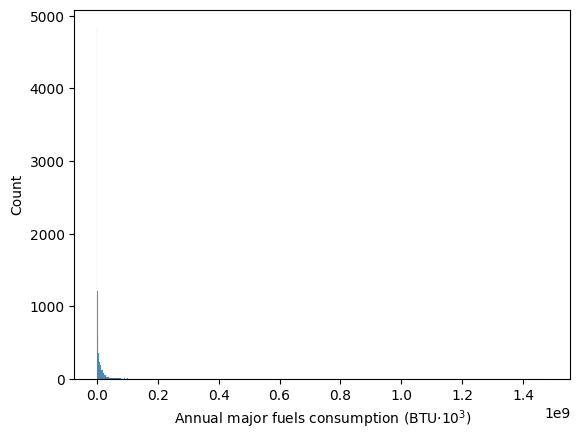

In [ ]:
# Drop all instances where the expected target variable isn't reported
df.dropna(subset='MFBTU')

sns.histplot(df["MFBTU"])
plt.xlabel(r"Annual major fuels consumption (BTU$\cdot10^{3}$)")
plt.ylabel("Count")

Text(0.5, 1.0, 'Distribution of target variable is log normal')

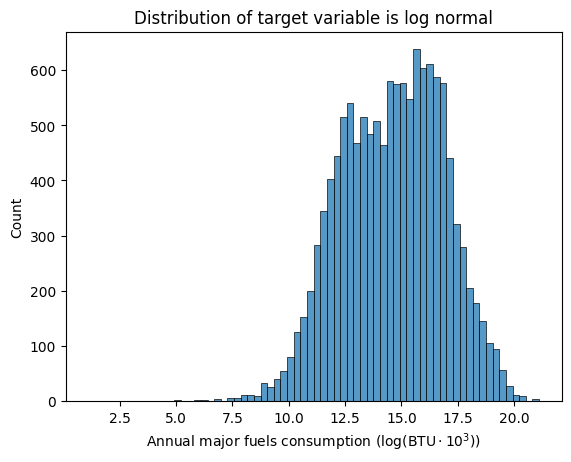

In [85]:
# Clearly the target variable is not normally distributed. Check to see if log-normal.
sns.histplot(np.log(df["MFBTU"]))
plt.xlabel(r"Annual major fuels consumption ($\log(\text{BTU}\cdot10^{3}$))")
plt.ylabel("Count")
plt.title("Distribution of target variable is log normal")